# Type 1 transition 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom

# What we're here for
from tyssue.topology.sheet_topology import type1_transition

## model and solver
from tyssue.dynamics.sheet_vertex_model import SheetModel as model
from tyssue.solvers.quasistatic import QSSolver

# 2D plotting
from tyssue.draw import sheet_view

#I/O
from tyssue.io import hdf5
plt.style.use('bmh')

import logging


![Type 1 transition](../../doc/illus/t1_transition.png)

Reseting column contractility of the face dataset with new specs
Reseting column vol_elasticity of the face dataset with new specs
Reseting column prefered_height of the face dataset with new specs
Reseting column prefered_area of the face dataset with new specs
Reseting column prefered_vol of the face dataset with new specs
Reseting column radial_tension of the vert dataset with new specs
Reseting column is_active of the vert dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column uz of the edge dataset with new specs
Reseting column line_tension of the edge dataset with new specs
Reseting column is_active of the edge dataset with new specs


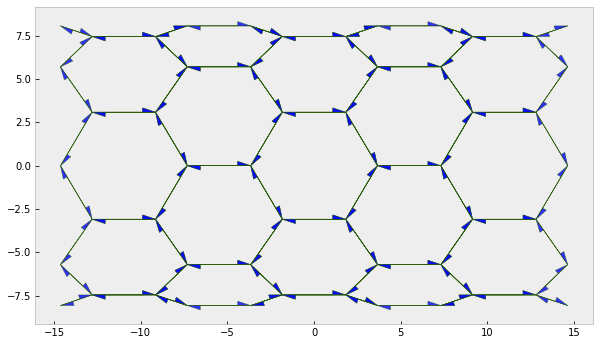

In [9]:
solver = QSSolver()

h5store = 'data/small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store,
                              data_names=['face', 'vert', 'edge'])
specs = config.geometry.cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)


geom.update_all(sheet)

nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = model.dimensionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

solver_settings = {'options': {'gtol':1e-4}}

sheet.get_opposite()
sheet.vert_df.is_active = 0

active_edges = (sheet.edge_df['opposite'] > -1)
active_verts = set(sheet.edge_df[active_edges]['srce'])

sheet.vert_df.loc[active_verts, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'],
                     edge={'head_width': 0.5},
                     vert={'visible': False})
fig.set_size_inches(10, 6)


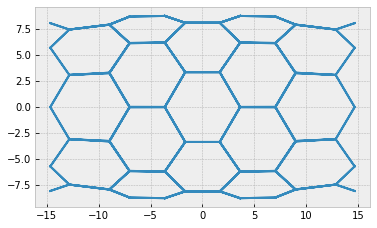

In [14]:
res = solver.find_energy_min(sheet, geom, model, **solver_settings)
fig, ax = sheet_view(sheet, mode="quick", coords=['z', 'x'])


In [15]:
from tyssue.topology.sheet_topology import type1_transition

In [16]:
type1_transition(sheet, 84)
geom.update_all(sheet)


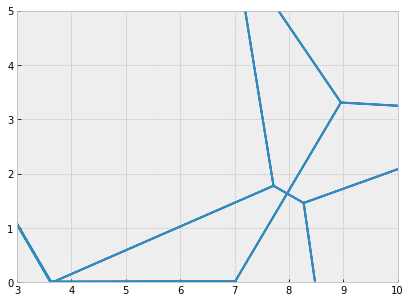

In [18]:

fig, ax = sheet_view(sheet, ['z', 'x'], mode="quick")

ax.set_xlim(3, 10)
ax.set_ylim(0, 5)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


True


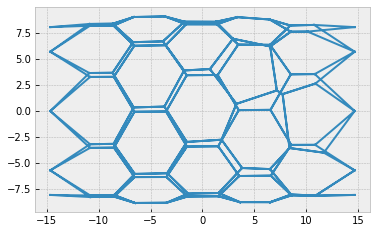

In [20]:
res = solver.find_energy_min(sheet, geom, model)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'], mode="quick")


In [21]:
sheet.validate()

True

#### Type 1 transitions can also be performed on edge faces

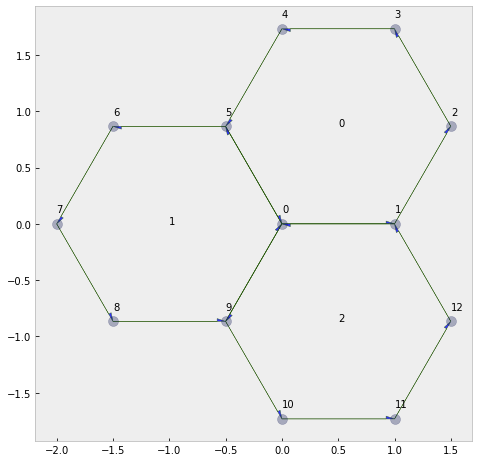

In [23]:
from tyssue.generation import three_faces_sheet

sheet = Sheet('3f', *three_faces_sheet())
geom.update_all(sheet)
fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)

for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)
for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)



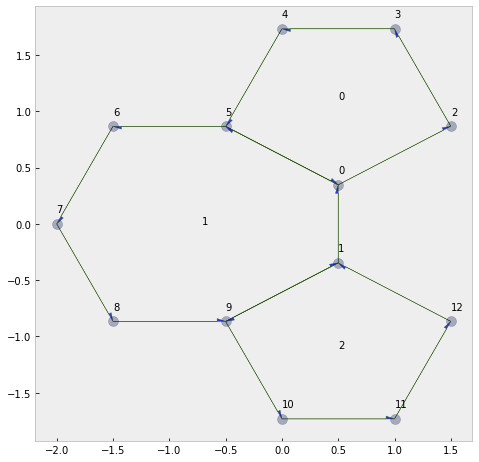

In [24]:

type1_transition(sheet, 0, epsilon=0.4)
sheet.reset_index()

geom.update_all(sheet)

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)

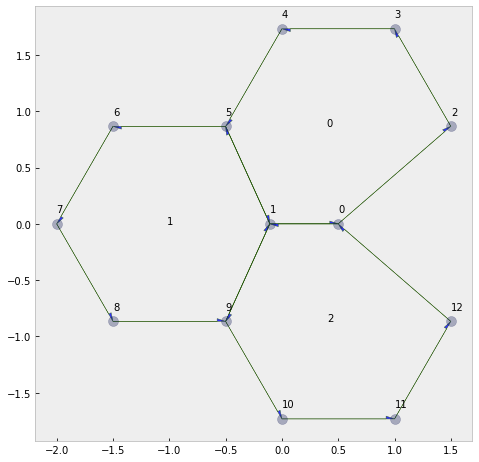

In [25]:
type1_transition(sheet, 16, epsilon=0.5)

geom.update_all(sheet)

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)

In [26]:
sheet.validate()

True

True


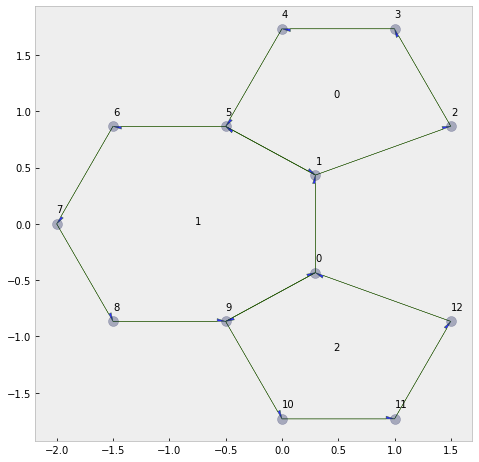

In [27]:
type1_transition(sheet, 17, epsilon=0.5)

geom.update_all(sheet)
print(sheet.validate())

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)